<a href="https://colab.research.google.com/github/raul-gomes/python_pandas/blob/main/Aula2_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Inicio do projeto**

In [1]:
import pandas as pd

In [2]:
aracaju = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/datasets/Aracaju.xlsx')
fortaleza = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/datasets/Fortaleza.xlsx')
natal = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/datasets/Natal.xlsx')
recife = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/datasets/Recife.xlsx')
salvador = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/datasets/Salvador.xlsx')

In [3]:
aracaju.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [4]:
cidades = pd.concat([aracaju, fortaleza, natal, recife, salvador])

In [5]:
cidades.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [6]:
cidades.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [7]:
cidades.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
196,Salvador,2019-01-02,145.09,1036,2
66,Salvador,2019-01-01,70.20,1035,3
80,Recife,2019-01-01,114.14,982,8
42,Salvador,2019-01-01,44.28,1034,1
20,Recife,2019-01-01,42.35,982,3


In [8]:
cidades.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
111,Aracaju,2018-01-01,24.25,1523,1
121,Natal,2019-01-02,100.70,1037,3
219,Salvador,2019-01-02,19.67,1037,2
54,Recife,2019-01-01,23.43,982,7
88,Recife,2019-01-01,180.24,980,6


In [9]:
# Verifica o tipo de dados de cada coluna.
cidades.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [10]:
# Muda o tipo de dados da coluna
cidades['LojaID'] = cidades['LojaID'].astype('object')

In [11]:
cidades.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [12]:
cidades.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [14]:
cidades['Vendas']

0      142.00
1       14.21
2       71.55
3        3.01
4       24.51
        ...  
235     41.84
236    126.29
237     38.06
238    139.64
239    161.41
Name: Vendas, Length: 894, dtype: float64

In [ ]:
# Substitindo os valores nulos pela média
cidades['Vendas'].fillna(cidades['vendas'].mean(), inplace=True)

In [ ]:
# Substitindo os valores nulos por 0
cidades['Vendas'].fillna(0, inplace=True)

In [ ]:
# Apagar as linhas com valores nulos
cidades.dropna(inplace=True)

In [ ]:
# Apagar as linhas com valores nulos com base apenas em 1 coluna
cidades.dropna(subset=['Vendas'], inplace=True)

In [ ]:
# Removendo linhas que estejam com valores faltantes em todas as colunas
cidades.dropna(how='all', inplace=True)

## **Criando colunas novas**

In [15]:
# Criando uma nova coluna
cidades['Receita'] = cidades['Vendas'].mul(cidades['Qtde'])

In [17]:
cidades.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [18]:
cidades['Receita/Vendas'] = cidades['Receita'] / cidades['Vendas']

In [19]:
cidades.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [20]:
# Retornando a maior receita
cidades['Receita'].max()

3544.0

In [21]:
# Retornando o minimo da receita
cidades['Receita'].min()

3.34

In [22]:
# Retorna a linha completa com os maiores valores do campo selecionado
cidades.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [23]:
# Retorna a linha completa com os menores valores do campo selecionado
cidades.nsmallest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [24]:
# Agrupamento por cidade
cidades.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [28]:
cid = cidades.groupby('Cidade')['Receita'].sum()

In [30]:
cid

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [31]:
type(cid)

pandas.core.series.Series

In [33]:
cid.dtype

dtype('float64')

In [34]:
cid.nlargest(1)

Cidade
Natal    167227.52
Name: Receita, dtype: float64

In [35]:
cid.nsmallest(1)

Cidade
Fortaleza    37913.97
Name: Receita, dtype: float64

In [39]:
# Ordenando o conjunto de dados
cidades.sort_values('Receita', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


## **Trabalhando com datas**


In [44]:
cidades.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [41]:
cidades['Data'] = cidades['Data'].astype('int64')

In [46]:
cidades['Data'] = pd.to_datetime(cidades['Data'])

In [47]:
cidades.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [48]:
# Agrupamento por ano
cidades.groupby(cidades['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [49]:
# Criando uma nova coluna com o ano
cidades['Ano_Venda'] = cidades['Data'].dt.year

In [50]:
cidades.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda
184,Natal,2019-01-02,167.16,1037,1,167.16,1.0,2019
49,Fortaleza,2019-01-01,183.33,1002,6,1099.98,6.0,2019
12,Recife,2019-01-01,17.48,982,2,34.96,2.0,2019
31,Natal,2018-04-03,401.00,854,4,1604.00,4.0,2018
136,Salvador,2019-03-02,13.81,1036,1,13.81,1.0,2019


In [51]:
# Extraindo o mês e o dia
cidades['mes_venda'], cidades['dia_venda'] = (cidades['Data'].dt.month, cidades['Data'].dt.day)

In [56]:
cidades.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda
103,Recife,2019-01-01,41.65,982,3,124.95,3.0,2019,1,1
65,Recife,2019-01-01,4.01,981,1,4.01,1.0,2019,1,1
22,Natal,2018-06-21,621.00,853,3,1863.00,3.0,2018,6,21
167,Salvador,2019-01-02,36.42,1037,1,36.42,1.0,2019,1,2
41,Fortaleza,2019-02-13,191.29,1002,3,573.87,3.0,2019,2,13


In [54]:
# Retornando a data mais antiga
cidades['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [55]:
# Retornando a data mais nova
cidades['Data'].max()

Timestamp('2019-04-05 00:00:00')

In [57]:
# Calculando a diferença de dias
cidades['Diferenca_dias'] = cidades['Data'] - cidades['Data'].min()

In [58]:
cidades.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,Diferenca_dias
212,Natal,2019-01-02,50.73,1037,3,152.19,3.0,2019,1,2,366 days
234,Salvador,2019-01-03,48.39,1035,2,96.78,2.0,2019,1,3,367 days
144,Natal,2019-01-02,23.38,1034,1,23.38,1.0,2019,1,2,366 days
186,Natal,2019-01-02,169.09,1036,2,338.18,2.0,2019,1,2,366 days
61,Aracaju,2018-01-01,39.80,1520,6,238.80,6.0,2018,1,1,0 days


In [59]:
# Calculando a coluna trimestre
cidades['Trimestre_venda'] = cidades['Data'].dt.quarter

In [60]:
cidades.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,Diferenca_dias,Trimestre_venda
103,Recife,2019-01-01,41.65,982,3,124.95,3.0,2019,1,1,365 days,1
237,Salvador,2019-01-03,38.06,1036,3,114.18,3.0,2019,1,3,367 days,1
0,Natal,2018-08-27,606.00,853,2,1212.00,2.0,2018,8,27,238 days,3
130,Recife,2019-03-02,12.36,983,4,49.44,4.0,2019,3,2,425 days,1
85,Salvador,2019-01-01,16.88,1035,3,50.64,3.0,2019,1,1,365 days,1


In [63]:
# Filtrando as vendas de 2019 do mês de março
vendas_marco_2019 = cidades.loc[(cidades['Data'].dt.year == 2019) & (cidades['Data'].dt.month == 3)]

In [64]:
vendas_marco_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano_Venda,mes_venda,dia_venda,Diferenca_dias,Trimestre_venda
108,Fortaleza,2019-03-02,152.89,981,4,611.56,4.0,2019,3,2,425 days,1
109,Fortaleza,2019-03-02,18.90,982,6,113.40,6.0,2019,3,2,425 days,1
110,Fortaleza,2019-03-02,51.98,983,6,311.88,6.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
112,Fortaleza,2019-03-02,133.59,982,1,133.59,1.0,2019,3,2,425 days,1
...,...,...,...,...,...,...,...,...,...,...,...,...
137,Salvador,2019-03-02,51.66,1036,3,154.98,3.0,2019,3,2,425 days,1
138,Salvador,2019-03-02,212.03,1037,3,636.09,3.0,2019,3,2,425 days,1
139,Salvador,2019-03-02,169.01,1036,1,169.01,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1


## **Visualização de Dados**

In [65]:
cidades['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

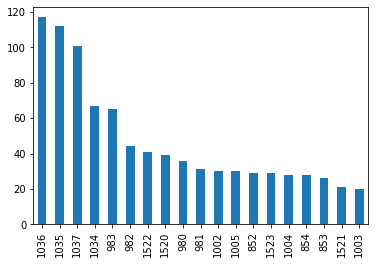

In [66]:
# Gráficos de barras
cidades['LojaID'].value_counts(ascending=False).plot.bar()

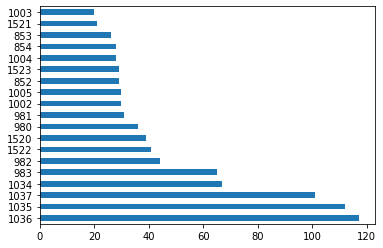

In [67]:
# Grafico de barras Horizontais
cidades['LojaID'].value_counts().plot.barh()

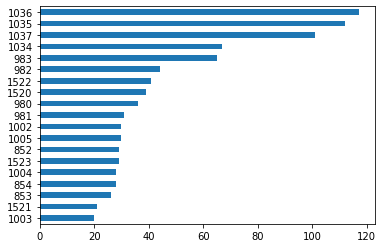

In [73]:
# Grafico de barras Horizontais
cidades['LojaID'].value_counts(ascending=True).plot.barh();

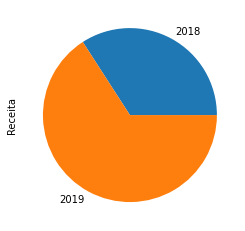

In [74]:
# Gráfico de Pizza
cidades.groupby(cidades['Data'].dt.year)['Receita'].sum().plot.pie();

In [72]:
# Total de vendas por cidade
cidades['Cidade'].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

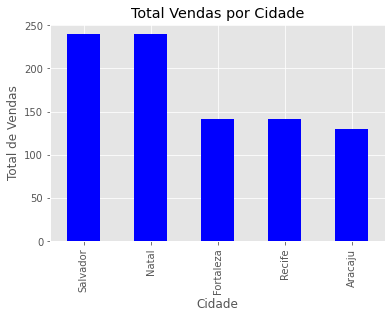

In [80]:
# Adicionando um título e altreando o nome dos eixos
import matplotlib.pyplot as plt
cidades['Cidade'].value_counts().plot.bar(title='Total Vendas por Cidade', color='blue')
plt.xlabel('Cidade')
plt.ylabel('Total de Vendas');

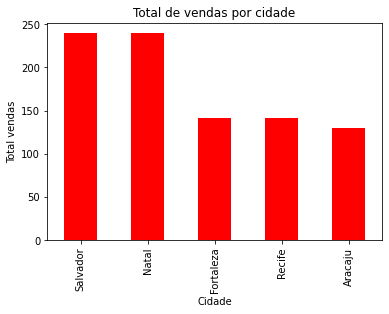

In [76]:
# Alterando a cor
cidades['Cidade'].value_counts().plot.bar(title='Total de vendas por cidade', color='red')
plt.xlabel('Cidade')
plt.ylabel('Total vendas');


In [77]:
# Alterando o estilo
plt.style.use('ggplot')

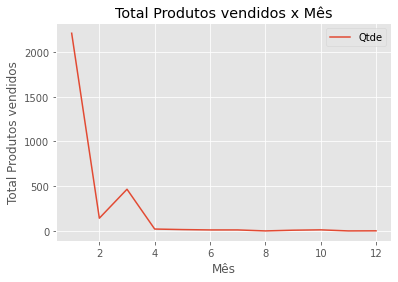

In [86]:
cidades.groupby(cidades['mes_venda'])['Qtde'].sum().plot(title = "Total Produtos vendidos x Mês")
plt.xlabel("Mês")
plt.ylabel('Total Produtos vendidos');
plt.legend();

In [84]:
cidades.groupby(cidades['mes_venda'])['Qtde'].sum()

mes_venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [85]:
# Selecionando apenas as vendas de 2019
vendas_2019 = cidades[cidades['Ano_Venda'] == 2019]

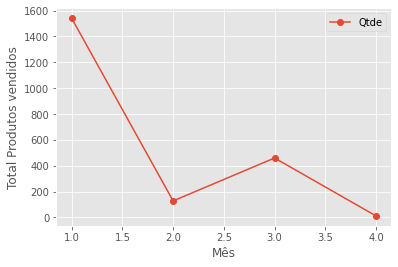

In [90]:
vendas_2019.groupby(vendas_2019['mes_venda'])['Qtde'].sum().plot(marker = "o")
plt.xlabel("Mês")
plt.ylabel('Total Produtos vendidos')
plt.legend();

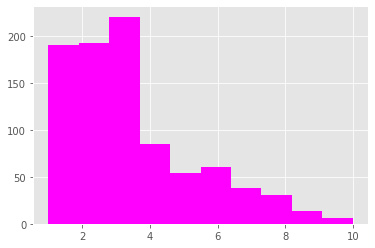

In [92]:
# Hisograma
plt.hist(cidades['Qtde'], color='magenta');

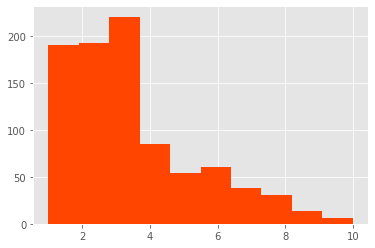

In [95]:
plt.hist(cidades['Qtde'], color='orangered');

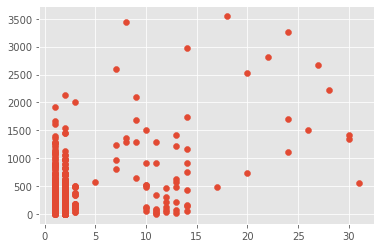

In [93]:
plt.scatter(x = vendas_2019['dia_venda'], y = vendas_2019['Receita']);

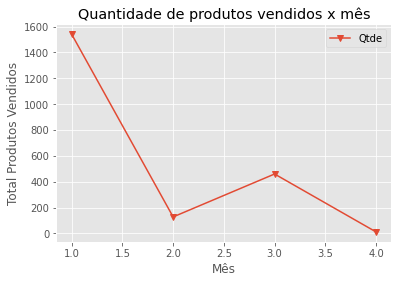

In [96]:
# Salvando em png
vendas_2019.groupby(vendas_2019['mes_venda'])['Qtde'].sum().plot(marker = 'v')
plt.title('Quantidade de produtos vendidos x mês')
plt.xlabel('Mês')
plt.ylabel('Total Produtos Vendidos');
plt.legend()
plt.savefig("gratfico QTDE x Mes.png")